In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# from google.colab import drive 
# drive.mount('/content/drive')

In [52]:
data_train = pd.read_csv("train.csv")

In [53]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [54]:
data_train.shape

(14999, 9)

In [55]:
category ={'A': 1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
data_train["category"] = data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [56]:
data_train = data_train[data_train.views !='F']
data_train = data_train[data_train.likes !='F']
data_train = data_train[data_train.dislikes !='F']
data_train = data_train[data_train.comment !='F']

In [57]:
data_train.shape

(14637, 9)

In [58]:
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"] = pd.to_numeric(data_train["adview"])

In [59]:
column_vidid = data_train['vidid']

In [60]:
from sklearn.preprocessing import LabelEncoder
data_train['duration'] = LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid'] = LabelEncoder().fit_transform(data_train['vidid'])
data_train['published'] = LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [61]:
# convert time in sec for duration
import datetime
import time

In [62]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    p = ["H", "M", "S"]
    for i in y:
        if i not in p:
            mm +=i
        else:
            if(i=="H"):
                h = mm
                mm =''
            elif(i=="M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m ==''):
        m = '00'
    if(s ==''):
        s = '00'
    bp = h+':'+m+':'+s
    return bp

train = pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h,m,s = time_string.split(':')
    return int(h)*3600 + int(m)*60 + int(s)

time1 = time.apply(func_sec)

data_train["duration"] = time1 

data_train.head()
    

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


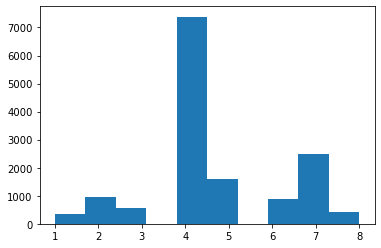

In [63]:
plt.hist(data_train["category"])
plt.show()

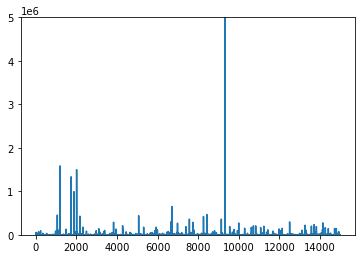

In [64]:
plt.plot(data_train["adview"])
plt.ylim(0, 5000000)
plt.show()

In [65]:
data_train = data_train[data_train["adview"]<2000000]

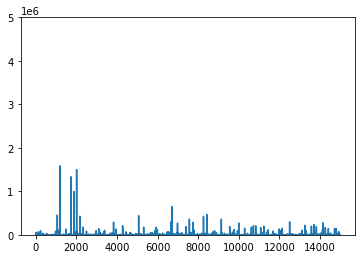

In [66]:
plt.plot(data_train["adview"])
plt.ylim(0, 5000000)
plt.show()

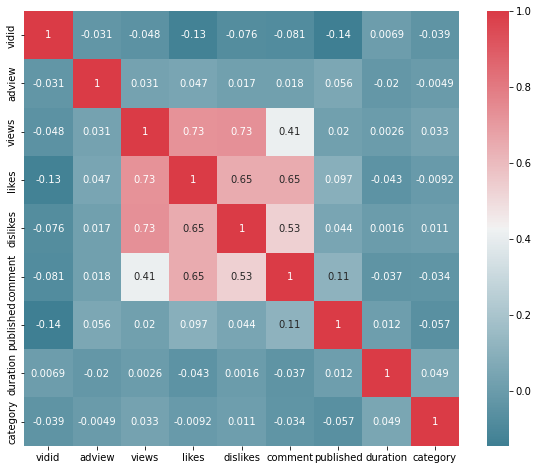

In [67]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10,8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr,dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax = ax, annot=True)
plt.show()

In [68]:
# split data
y_train = pd.DataFrame(data = data_train.iloc[:,1].values, columns = ['target'])
data_train = data_train.drop(['adview'],axis=1)
data_train = data_train.drop(['vidid'],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, y_train, test_size=0.2, random_state=42)
X_train

,views,likes,dislikes,comment,published,duration,category
13440,86739,117,9,4,1217,180,4
9523,1419766,887,362,232,1547,5811,7
3012,26086,19,0,9,966,178,6
1888,305445,3662,45,555,1484,257,7
11378,737649,1702,96,53,1127,895,4
...,...,...,...,...,...,...,...
5316,31648,140,24,14,1925,231,7
13748,1804,4,1,0,1049,232,4
5522,204817,86,35,11,1237,218,4
883,1361366,1384,757,185,2145,240,7


In [70]:
X_train.describe()

,views,likes,dislikes,comment,published,duration,category
count,1.170800e+04,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000
mean,6.974161e+05,2771.122139,251.030577,418.178767,1551.810215,1048.108985,4.611548
std,2.582877e+06,8734.608422,965.881840,1556.703705,579.565587,2379.930309,1.579242
min,4.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.133975e+04,86.000000,7.000000,7.000000,1144.000000,188.000000,4.000000
50%,1.609395e+05,461.000000,39.000000,46.000000,1704.000000,327.000000,4.000000
75%,5.842132e+05,1897.000000,170.000000,232.000000,2065.000000,726.000000,6.000000
max,1.380479e+08,283824.000000,49449.000000,75045.000000,2383.000000,42317.000000,8.000000


In [71]:
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [72]:
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                                         prediction)))

In [73]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test, y_test, linear_regression)

Mean Absolute Error: 3707.3780058245347
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [74]:
linear_regression.predict(X_test)

array([[-1041.40299121],
       [ 2737.25119825],
       [  393.4111476 ],
       ...,
       [ -945.54652298],
       [ 2944.53211924],
       [-1497.73414422]])

In [75]:
y_test = y_test.reset_index()
y_test

,index,target
0,4791,5
1,4800,2
2,3717,5
3,8876,1
4,8288,2
...,...,...
2923,3694,1
2924,4872,9
2925,6791,1
2926,750,2


In [76]:
y_test.drop('index', axis=1, inplace=True)

In [77]:
y_test

,target
0,5
1,2
2,5
3,1
4,2
...,...
2923,1
2924,9
2925,1
2926,2


In [92]:
lin_pred = np.array(linear_regression.predict(X_test))
df = pd.DataFrame(lin_pred, columns = ['lin_predictions'])
df['actual'] = y_test
df

,lin_predictions,actual
0,-1041.402991,5
1,2737.251198,2
2,393.411148,5
3,-1922.802367,1
4,2375.227609,2
...,...,...
2923,3144.879862,1
2924,-1154.311955,9
2925,-945.546523,1
2926,2944.532119,2


In [93]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test, y_test, decision_tree)

Mean Absolute Error: 2622.6352459016393
Mean Squared Error: 885261927.2377049
Root Mean Squared Error: 29753.35152949504


In [94]:
decision_tree.predict(X_test)

array([21.,  1.,  9., ...,  1.,  1.,  1.])

In [95]:
dec_pred = np.array(decision_tree.predict(X_test))
df["dec_predctions"]=dec_pred
df

,lin_predictions,actual,dec_predctions
0,-1041.402991,5,21.0
1,2737.251198,2,1.0
2,393.411148,5,9.0
3,-1922.802367,1,2.0
4,2375.227609,2,1.0
...,...,...,...
2923,3144.879862,1,1.0
2924,-1154.311955,9,26.0
2925,-945.546523,1,1.0
2926,2944.532119,2,1.0


In [82]:
crrt = df[df["dec_predictions"]==df["actual"]]
crrt


,dec_predictions,actual
11,4.0,4
12,1.0,1
13,2.0,2
16,1.0,1
18,1.0,1
...,...,...
2921,1.0,1
2922,1.0,1
2923,1.0,1
2925,1.0,1


In [86]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth =25
min_depth =25
min_samples_split =15
min_samples_leaf = 2
random_forest =RandomForestRegressor(n_estimators=n_estimators,
                                     max_depth=max_depth, min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,y_train)
print_error(X_test, y_test, random_forest)

C:\Users\rraj4\AppData\Local\Temp/ipykernel_17280/1748904204.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3333.5636529129665
Mean Squared Error: 689740941.5446655
Root Mean Squared Error: 26262.919516776223


In [87]:
random_forest.predict(X_test)

array([ 20.35710817,  13.94837567,   6.16867028, ..., 425.35541682,
        32.61257534,  16.37675413])

In [88]:
ran_pred = np.array(random_forest.predict(X_test))

In [96]:
df["ran_pred"]=ran_pred
df

,lin_predictions,actual,dec_predctions,ran_pred
0,-1041.402991,5,21.0,20.357108
1,2737.251198,2,1.0,13.948376
2,393.411148,5,9.0,6.168670
3,-1922.802367,1,2.0,6.301735
4,2375.227609,2,1.0,4443.849666
...,...,...,...,...
2923,3144.879862,1,1.0,11563.448469
2924,-1154.311955,9,26.0,22.791494
2925,-945.546523,1,1.0,425.355417
2926,2944.532119,2,1.0,32.612575


In [98]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, y_train)
print_error(X_test, y_test, supportvector_regressor)

C:\Users\rraj4\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error: 1696.9438599505638
Mean Squared Error: 833685776.029172
Root Mean Squared Error: 28873.617300732723


In [99]:
supportvector_regressor.predict(X_test)

array([2.83370571, 1.56024738, 1.83527848, ..., 2.36654403, 1.79466581,
       2.45098439])

In [103]:
svm_pred = np.array(supportvector_regressor.predict(X_test))
df["svm_pred"]=svm_pred
df

,lin_predictions,actual,dec_predctions,ran_pred,svm_pred
0,-1041.402991,5,21.0,20.357108,2.833706
1,2737.251198,2,1.0,13.948376,1.560247
2,393.411148,5,9.0,6.168670,1.835278
3,-1922.802367,1,2.0,6.301735,2.573688
4,2375.227609,2,1.0,4443.849666,1.554882
...,...,...,...,...,...
2923,3144.879862,1,1.0,11563.448469,1.939683
2924,-1154.311955,9,26.0,22.791494,2.470844
2925,-945.546523,1,1.0,425.355417,2.366544
2926,2944.532119,2,1.0,32.612575,1.794666
